**<p>Including libraries</p>**

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import imageio.v2 as imageio
from PIL import Image
from io import BytesIO

# **Calculus Tasks**

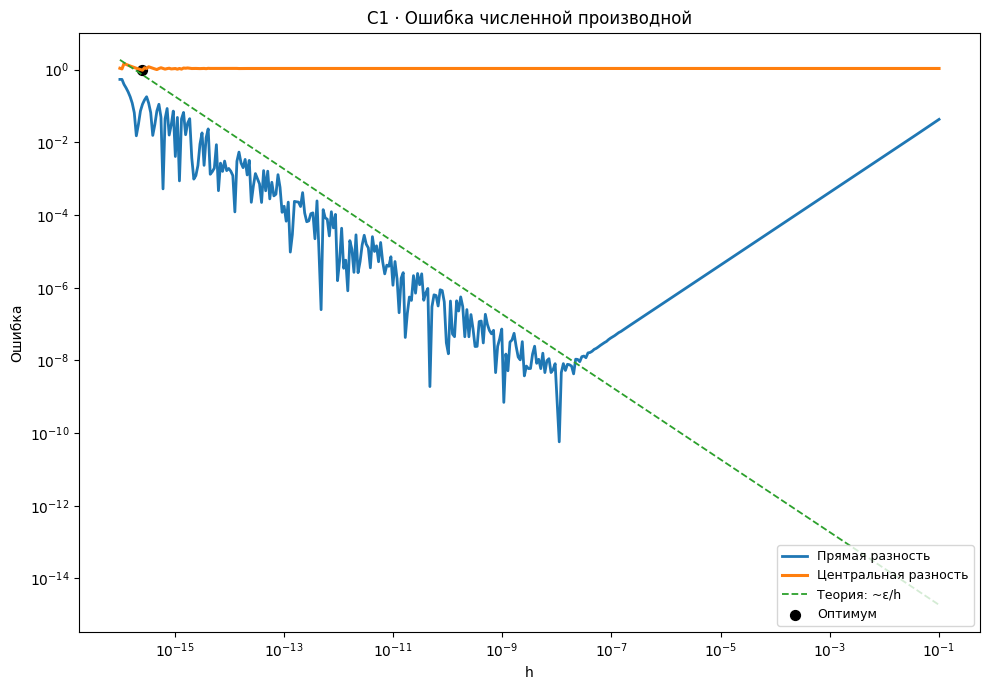

In [2]:
# ==========================
# C1 · ДЗ: Истинная точность численной производной
# ==========================


x0 = 1
f = np.sin
df = np.cos
true = df(x0)
eps = np.finfo(float).eps
h = np.logspace(-16, -1, 400)


# TODO
def forward_diff(f, x, h):
    """заполнить здесь код"""
    deriv = (f(x + h) - f(x)) / h
    #raise NotImplementedError
    return deriv


# TODO
def central_diff(f, x, h):
    """заполнить здесь код"""
    deriv = (f(x + h) - f(x - h)) / (2 * h)
    #raise NotImplementedError
    return deriv


# !!!ЗДЕСЬ НЕ НУЖНО МЕНЯТЬ, ЭТО ВЫВОД КАРТИНОК!!!
def theory_lines(h, x0=x0):
    """Оценки ошибок усечения и округления"""
    C_trunc = abs(np.cos(x0)) / 6
    C_round = abs(np.sin(x0)) * eps
    round_line = C_round / h
    return round_line


def make_figure():
    approx_f = forward_diff(f, x0, h)
    approx_c = central_diff(f, x0, h)
    err_f = np.abs(approx_f - true)
    err_c = np.abs(approx_c - true)
    round_line = theory_lines(h)
    imin = np.argmin(err_c)
    plt.figure(figsize=(10, 7))
    sns.lineplot(x=h, y=err_f, label="Прямая разность", lw=2)
    sns.lineplot(x=h, y=err_c, label="Центральная разность", lw=2.2)
    plt.loglog(h, round_line, '--', label="Теория: ~ε/h", lw=1.3)
    plt.scatter([h[imin]], [err_c[imin]], s=50, color='black', label="Оптимум")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("h")
    plt.ylabel("Ошибка")
    plt.title("C1 · Ошибка численной производной")
    plt.legend(loc="lower right", fontsize=9)
    plt.tight_layout()
    plt.show()
    
make_figure()

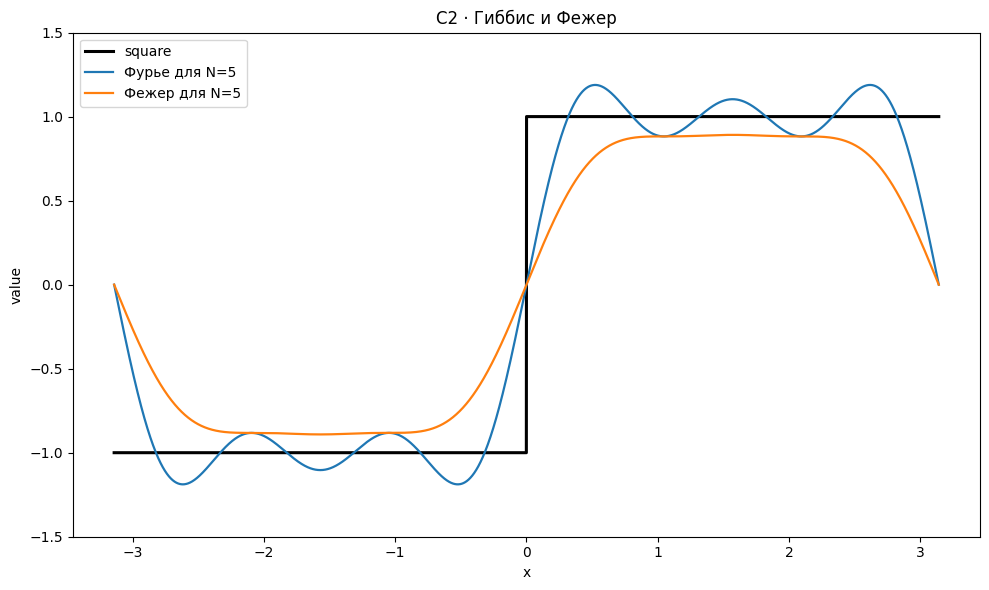

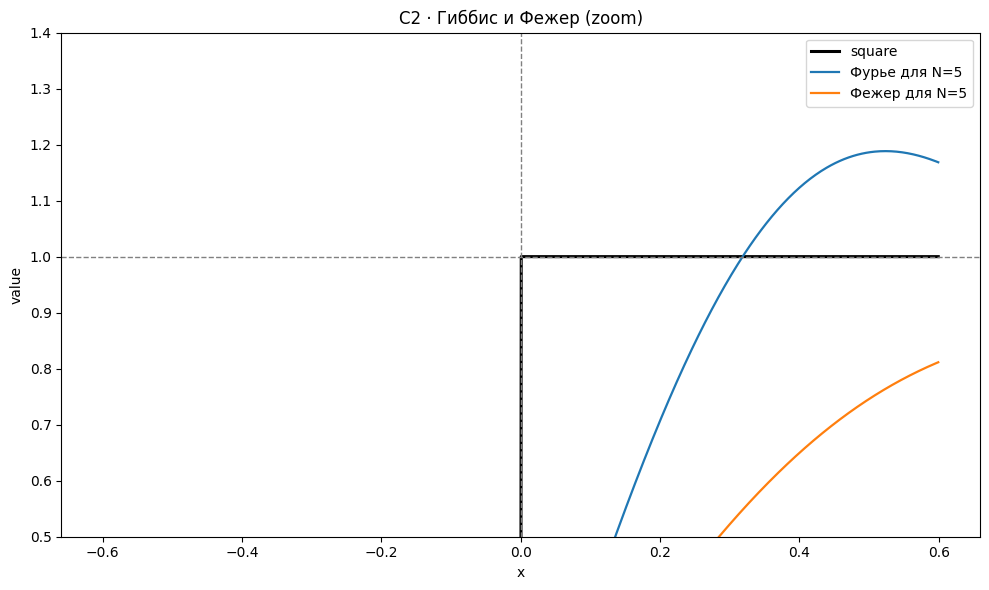

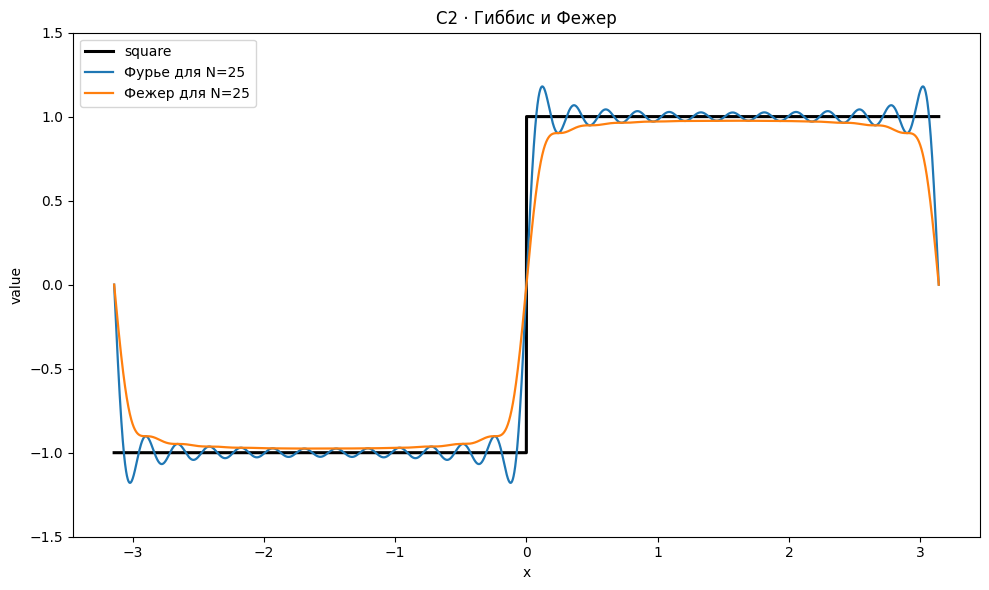

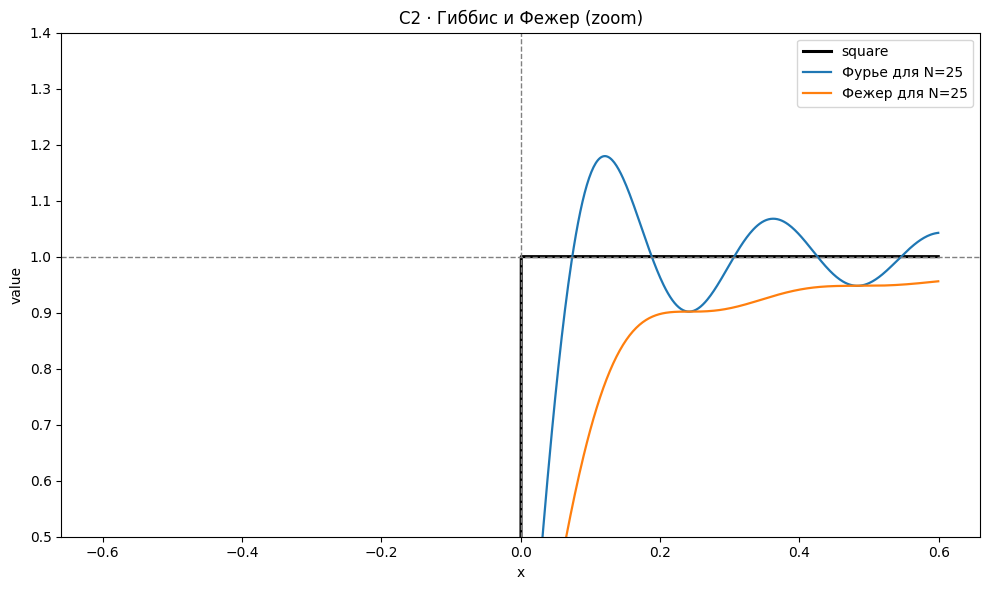

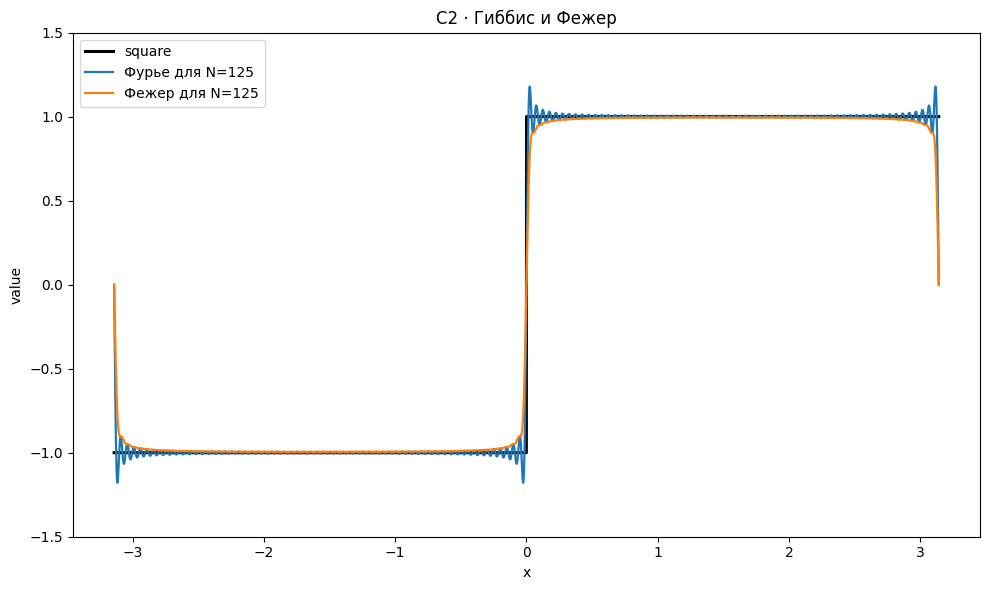

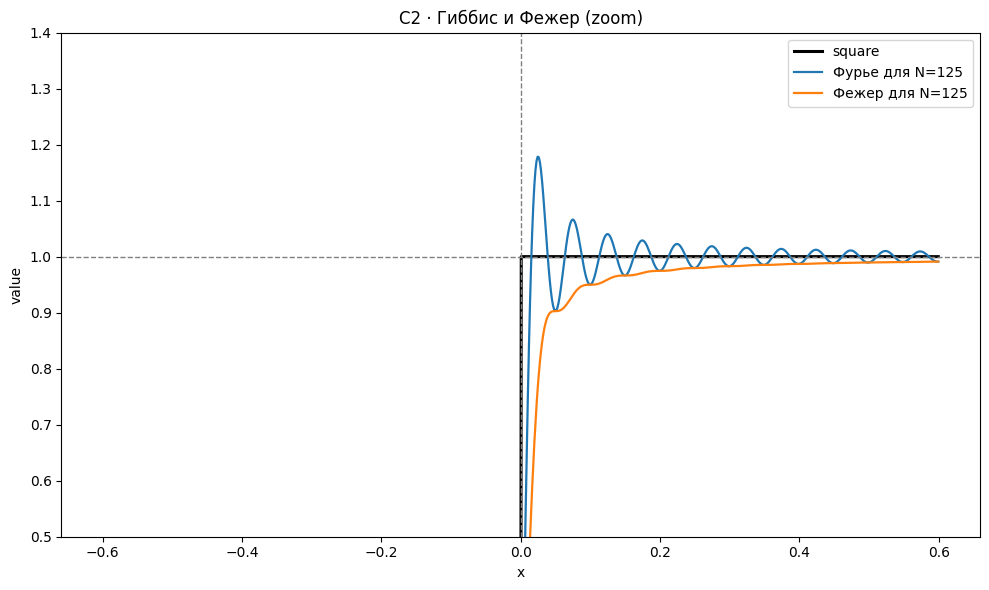

In [85]:
# ==========================
# C2 · ДЗ: Феномен Гиббса и сумма Фежера
# ==========================


#TODO
def square_wave(x: np.ndarray):
    """Идеальная квадратная волна (±1)."""
    y_true: np.ndarray = np.where(x > 0, 1, -1)
    return y_true


#TODO
def fourier_square_wave(x: np.ndarray, N: int) -> np.ndarray:
    """Реализация формулы ряда Фурье для квадратной волны."""
    y_true: np.ndarray = np.zeros(len(x))
    for k in range(1, N + 1, 2):
        y_true += 4 / np.pi * (np.sin(k * x) / k)
    return y_true


# !!!ЗДЕСЬ НЕ НУЖНО МЕНЯТЬ, ЭТО ВЫВОД КАРТИНОК/СЛУЖЕБНОЕ!!!
def fejer_sum_square(x, N):
    ks = np.arange(1, N + 1, 2)
    weights = 1 - ks / (N + 1.0)
    s = np.sum(weights[:, None] * (np.sin(np.outer(ks, x))/ks[:, None]), axis=0)
    return (4 / np.pi) * s

    
def plot_pair(N, zoom=False):
    x = np.linspace(-np.pi, np.pi, 4000)
    y_true = square_wave(x)
    yN = fourier_square_wave(x, N)
    yF = fejer_sum_square(x, N)
    if zoom:
        mask = (x > -0.6) & (x < 0.6)
        x, y_true, yN, yF = x[mask], y_true[mask], yN[mask], yF[mask]
        
    plt.figure(figsize=(10, 6))
    plt.plot(x, y_true, linewidth=2.2, label="square", color="black")
    plt.plot(x, yN, linewidth=1.6, label=f"Фурье для N={N}")
    plt.plot(x, yF, linewidth=1.6, label=f"Фежер для N={N}")
    if not zoom:
        plt.ylim(-1.5, 1.5)
    else:
        plt.ylim(0.5, 1.4)
        plt.axhline(1.0, color="gray", linewidth=1.0, linestyle="--")
        plt.axvline(0.0, color="gray", linewidth=1.0, linestyle="--")
    plt.xlabel("x"); plt.ylabel("value")
    plt.title("C2 · Гиббис и Фежер (zoom)" if zoom else "C2 · Гиббис и Фежер")
    plt.legend()
    plt.tight_layout()
    plt.show()

              
# Пример:
for N in [5, 25, 125]:
    plot_pair(N, zoom=False)
    plot_pair(N, zoom=True)

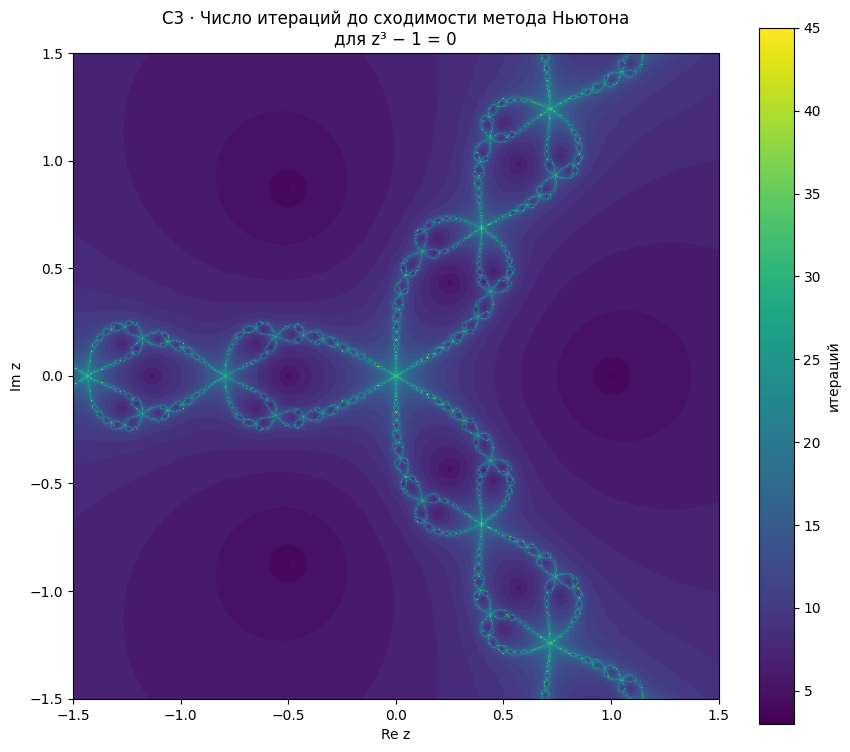

In [10]:
# ==========================
# C3 · ДЗ: Число итераций до сходимости метода Ньютона
# ==========================
#TODO
def newton_iterations(Z, max_iter=80, tol=1e-8):
    """
    Итерации Ньютона:
    z ← z − (z³ − 1) / (3z²)
    Проверяем сходимость к трём корням {1, e^{±2πi/3}}.
    Возвращает матрицу числа итераций до сходимости.
    """
    hist = np.zeros(Z.shape, dtype=int)
    z = np.copy(Z)
    notCloseToSolution = np.ones(Z.shape, dtype=bool)

    for i in range(max_iter):
        funcVal = z**3 - 1
        closeToSolution = np.abs(funcVal) < tol
        newly_converged = closeToSolution & notCloseToSolution
        hist[newly_converged] = i + 1
        notCloseToSolution &= ~closeToSolution

        if not np.any(notCloseToSolution):
            break

        derivative = 3 * z**2
        isntZero = np.abs(derivative) > 1e-14
        z[notCloseToSolution & isntZero] = (
            z[notCloseToSolution & isntZero] - (
                funcVal[notCloseToSolution & isntZero] / derivative[notCloseToSolution & isntZero]
            )
        )


    hist[notCloseToSolution] = 0
    return hist


def make_figure():
    n = 700
    xs = np.linspace(-1.5, 1.5, n)
    ys = np.linspace(-1.5, 1.5, n)
    X, Y = np.meshgrid(xs, ys)
    Z = X + 1j * Y
    steps = newton_iterations(Z)
    A = steps.astype(float)
    A[A == 0] = np.nan
    plt.figure(figsize=(9, 9))
    plt.imshow(A, origin="lower", extent=(xs[0], xs[-1], ys[0], ys[-1]),
                interpolation="nearest", cmap="viridis")
    plt.title("C3 · Число итераций до сходимости метода Ньютона\nдля z³ − 1 = 0")
    plt.xlabel("Re z")
    plt.ylabel("Im z")
    plt.colorbar(label="итераций", shrink=0.8)
    plt.tight_layout()
    plt.show()

make_figure()

In [74]:
import timeit

def func():
    epochs = 123
    n = 700
    xs = np.linspace(-1.5, 1.5, n)
    ys = np.linspace(-1.5, 1.5, n)
    X, Y = np.meshgrid(xs, ys)
    z_numpy_arr = X + 1j * Y
    z_numpy_arr = np.astype(z_numpy_arr, np.complex64)
    for epoch in range(epochs):
        z_numpy_arr -= (z_numpy_arr ** 3 - 1) / (2 * z_numpy_arr ** 2)
    return z_numpy_arr

# Используем timeit для измерения времени выполнения
timer = timeit.Timer(stmt=func)
results = timer.timeit(number=int(1))  # Измеряем время выполнения 5 раз
results * 100


135.95953899998676

# **ALGEBRA TASKS**

In [40]:
# ==========================
# A1 · ДЗ: Не коммутирует оно, точно ("Поворот" -> "Растяжение" vs "Растяжение" -> "Поворот") ли?
# ==========================
from scipy.ndimage import affine_transform


# TODO: реализовать матрицу поворота, достаточно будет 2х2 размера
def rotation(theta):
    rotationMatrix: np.ndarray = np.zeros(4).reshape(2, 2)
    
    rotationMatrix[0][0] = np.cos(theta)
    rotationMatrix[0][1] = -np.sin(theta)
    rotationMatrix[1][1] = np.cos(theta)
    rotationMatrix[1][0] = np.sin(theta)
    
    return rotationMatrix

# TODO: реализовать матрицу растяжения, также 2х2
def shear(a):
    shearMatrix: np.ndaray = np.eye(2) * a
    return shearMatrix
    

# !!!ЗДЕСЬ НЕ НУЖНО МЕНЯТЬ, ЭТО ВЫВОД КАРТИНОК/СЛУЖЕБНОЕ!!!
def fig_to_image(fig, dpi=110):
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=dpi, bbox_inches="tight")
    plt.close(fig)
    buf.seek(0)
    arr = imageio.imread(buf)
    buf.close()
    return arr

    
def load_image(path="John_von_Neumann.jpg", max_side=320):
    img = Image.open(path).convert("RGB")
    w0, h0 = img.size
    scale = max_side / max(w0, h0)
    w, h = int(round(w0*scale)), int(round(h0*scale))
    img = img.resize((w, h), Image.BICUBIC)
    arr = np.asarray(img, dtype=np.float64)[::-1, :, :] / 255
    return arr

    
def apply_affine(img, M, bg=1.0):
    h, w, _ = img.shape
    center = np.array([w/2, h/2])
    cnt: int = 0
    
    try:
        M_inv = np.linalg.inv(M) 
    except np.linalg.LinAlgError:
        M_inv = np.linalg.pinv(M)
        cnt += 1
        
    out = np.zeros_like(img)
    for i in range(3):
        out[..., i] = affine_transform(
        img[..., i],
        M_inv,
        offset=center - M_inv @ center,
        order=1,
        mode="constant",
        cval=bg
        )
        
    return out, cnt


def draw_frame_image(img, title="", lim=1.35):
    fig = plt.figure(figsize=(6.2, 6.2))
    ax = fig.add_subplot(111)
    ax.imshow(img, extent=[-lim, lim, -lim, lim], origin="upper")
    ax.axhline(0, color="gray", lw=1.1)
    ax.axvline(0, color="gray", lw=1.1)
    ax.arrow(0, 0, 0.9, 0, color="red", head_width=0.05, length_includes_head=True)
    ax.arrow(0, 0, 0, 0.9, color="blue", head_width=0.05, length_includes_head=True)
    ax.set_xlim(-lim, lim); ax.set_ylim(lim, -lim)
    ax.set_aspect("equal"); ax.set_title(title); ax.axis("off")
    return fig


def make_image_noncommutative_gifs(path="AlgebraOneImages/John_von_Neumann.jpg",
                                   frames=36, hold_seconds=1.5, fps=12,
                                   out_rs="AlgebraOneImages/img_rotate_then_shear.gif",
                                   out_sr="AlgebraOneImages/img_shear_then_rotate.gif"):
    
    img0 = load_image(path)
    thetas = np.deg2rad(np.linspace(-50, 50, frames))
    a_vals = np.concatenate([np.linspace(0.0, 1.1, frames//2),
    np.linspace(1.1, 0.8, frames - frames//2)])
    imgs_RS, imgs_SR = [], []
    
    for k in range(frames):
        R = rotation(thetas[k])
        S = shear(a_vals[k])
        M_RS = R @ S # rotate ∘ shear
        M_SR = S @ R # shear ∘ rotate
        img_rs, cntRS = apply_affine(img0, M_RS)
        img_sr, cntSR = apply_affine(img0, M_SR)
        fig_rs = draw_frame_image(img_rs, title="Поворот ∘ растяжение")
        fig_sr = draw_frame_image(img_sr, title="Растяжение ∘ поворот")
        imgs_RS.append(fig_to_image(fig_rs))
        imgs_SR.append(fig_to_image(fig_sr))
                                  
    hold = [imgs_RS[-1]] * int(max(1, round(fps*hold_seconds)))
    imageio.mimsave(out_rs, imgs_RS + hold, fps=fps, loop=0)
    hold = [imgs_SR[-1]] * int(max(1, round(fps*hold_seconds)))
    imageio.mimsave(out_sr, imgs_SR + hold, fps=fps, loop=0)
    return out_rs, out_sr

make_image_noncommutative_gifs()

('AlgebraOneImages/img_rotate_then_shear.gif',
 'AlgebraOneImages/img_shear_then_rotate.gif')

In [32]:
def svdDecomposition(A: np.ndarray) -> tuple:
    U, sigm, vTransposed = np.linalg.svd(A)
    return U, sigm, vTransposed

Matrix: np.ndarray = np.array([[1, 3, 1] , [2, 5, 1]])
U, sigm, vT = svdDecomposition(Matrix)

sigmReal = np.hstack((np.diagflat(sigm), np.zeros(len(sigm)).reshape(len(sigm), 1)))
U @ sigmReal @ vT

array([[1., 3., 1.],
       [2., 5., 1.]])

In [39]:
# ==========================
# A2 · ДЗ: Низкорранговые приближения (SVD)
# ==========================
IMG_PATH = "AlgebraTwoImages/1.jpg"


# TODO: применить SVD к картинке, вернуть все компоненты разложения
def svd_channel(A):
    """Возвращает разложение A = U @ diag(s) @ Vt."""
    U, s, vT = np.linalg.svd(A)
    return U, s, vT

    
# !!!ЗДЕСЬ НЕ НУЖНО МЕНЯТЬ, ЭТО ВЫВОД КАРТИНОК/СЛУЖЕБНОЕ!!!
MAX_SIDE = 180
img0 = Image.open(IMG_PATH).convert("RGB")
w0, h0 = img0.size
scale = MAX_SIDE / max(w0, h0)
w, h = int(round(w0*scale)), int(round(h0*scale))
img = np.asarray(img0.resize((w, h), Image.BICUBIC), dtype=np.float64) / 255
U_list, s_list, Vt_list = [], [], []

for c in range(3):
    U, s, Vt = svd_channel(img[:,:,c])
    U_list.append(U); s_list.append(s); Vt_list.append(Vt)
    energy_total = sum([(s**2).sum() for s in s_list])

    
def cum_energy_at_k(k):
    num = sum([(s[:k]**2).sum() for s in s_list])
    return num / energy_total

    
def fig_to_image(fig, dpi=110):
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=dpi)
    plt.close(fig)
    buf.seek(0)
    arr = imageio.imread(buf)
    buf.close()
    return arr

    
def make_frames(frames=25):
    kmax = min(h, w)
    ks = np.unique(np.ceil(np.geomspace(1, kmax, frames)).astype(int))
    A = np.zeros_like(img)
    prev_k = 0; images=[]
    for k in ks:
        for t in range(prev_k, k):
            for c in range(3):
                u = U_list[c][:, t][:, None]
                v = Vt_list[c][t, :][None, :]
                A[:,:,c] += s_list[c][t] * (u @ v)
        prev_k = k
        fig = plt.figure(figsize=(7.5, 5.5))
        ax = fig.add_axes([0.05,0.05,0.9,0.9])
        ax.imshow(np.clip(A,0,1), origin="upper", interpolation="nearest")
        ax.set_title(f"SVD rank {k} — energy {100*cum_energy_at_k(k):.1f}%")
        ax.set_xticks([]); ax.set_yticks([])
        images.append(fig_to_image(fig))
        
    return images


def make_gif(out="AlgebraTwoImages/svd_reconstruction.gif"):
    images = make_frames()
    fps=12; hold=15
    imageio.mimsave(out, images+[images[-1]]*hold, fps=fps, loop=0)
    return out

gif_path = make_gif()

In [38]:
# ==========================
# A3 · ДЗ: SVD как композиция линейных операторов
# ==========================
from scipy.ndimage import affine_transform


# TODO: матрица поворота
def make_rotation(theta):
    matrix = rotation(theta)
    return matrix


# TODO: снова матрица растяжения
def make_scaling(sx, sy):
    mat = np.diagflat([sx, sy])
    return mat


# TODO: посчитать определитель входной матриц
def compute_det(M):
    determinant = np.linalg.det(M)
    return determinant

    
# !!!ЗДЕСЬ НЕ НУЖНО МЕНЯТЬ, ЭТО ВЫВОД КАРТИНОК/СЛУЖЕБНОЕ!!!
def fig_to_image(fig, dpi=110):
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=dpi, bbox_inches="tight")
    plt.close(fig)
    buf.seek(0)
    arr = imageio.imread(buf)
    buf.close()
    return arr


def load_image(path="Rosenblatt.jpg", max_side=256):
    img = Image.open(path).convert("RGB")
    w0, h0 = img.size
    scale = max_side / max(w0, h0)
    w, h = int(round(w0 * scale)), int(round(h0 * scale))
    img = img.resize((w, h), Image.BICUBIC)
    arr = np.asarray(img, dtype=np.float64)[::-1, :, :] / 255
    return arr


def apply_affine(img, M):
    """Реальное аффинное преобразование изображения через scipy.ndimage"""
    h, w, _ = img.shape
    center = np.array([w / 2, h / 2])
    try:
        M_inv = np.linalg.inv(M)
    except np.linalg.LinAlgError:
        M_inv = np.linalg.pinv(M)
    out = np.zeros_like(img)
    for i in range(3): # каждый канал
        out[..., i] = affine_transform(
            img[..., i],
            M_inv,
            offset=center - M_inv @ center,
            order=1,
            mode="constant",
            cval=1.0, # белый фон
        )
    return out


def plot_with_axes(img, title="", lim=1.3):
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111)
    ax.imshow(img, extent=[-lim, lim, -lim, lim], origin="upper")
    # оси координат
    ax.axhline(0, color="gray", lw=1)
    ax.axvline(0, color="gray", lw=1)
    ax.arrow(
            0, 0, 0.8, 0, color="red", head_width=0.05,
            length_includes_head=True
            )
    ax.arrow(
            0, 0, 0, 0.8, color="blue", head_width=0.05,
            length_includes_head=True
            )
    ax.set_xlim(-lim, lim)
    ax.set_ylim(lim, -lim)
    ax.set_aspect("equal")
    ax.set_title(title)
    ax.axis("off")
    return fig


def make_svd_image_gif(path="Rosenblatt.jpg",
    out="AlgebraThreeImages/svd_on_image_true.gif", frames=90):
    img = load_image(path)
    theta_v = np.pi / 4 # поворот Vᵀ
    theta_u = -np.pi / 6 # поворот U
    s1, s2 = 1.6, 0.6 # растяжение
    Vt = make_rotation(theta_v)
    U = make_rotation(theta_u)
    Sigma = make_scaling(s1, s2)
    imgs = []
    n1, n2, n3 = frames // 3, frames // 3, frames - 2*(frames // 3)
    
    for k in range(n1):
        frac = (k+1)/n1
        R = make_rotation(frac * theta_v)
        transformed = apply_affine(img, R)
        fig = plot_with_axes(transformed, title="Шаг 1: поворот (Vᵀ)")
        imgs.append(fig_to_image(fig))

    for k in range(n2):
        frac = (k+1)/n2
        Sig = make_scaling(1 + frac*(s1-1), 1 + frac*(s2-1))
        M = Sig @ Vt
        transformed = apply_affine(img, M)
        fig = plot_with_axes(transformed, title="Шаг 2: растяжение (Σ)")
        imgs.append(fig_to_image(fig))

    for k in range(n3):
        frac = (k+1)/n3
        R = make_rotation(frac * theta_u)
        M = R @ Sigma @ Vt
        det_val = compute_det(M)
        transformed = apply_affine(img, M)
        fig = plot_with_axes(transformed,
        title=f"Шаг 3: поворот (U) | det={det_val:.2f}")
        imgs.append(fig_to_image(fig))

    imageio.mimsave(out, imgs + [imgs[-1]]*20, fps=12)
    return out


make_svd_image_gif("AlgebraThreeImages/Rosenblatt.jpg")

'AlgebraThreeImages/svd_on_image_true.gif'

# **Probablity Tasks**

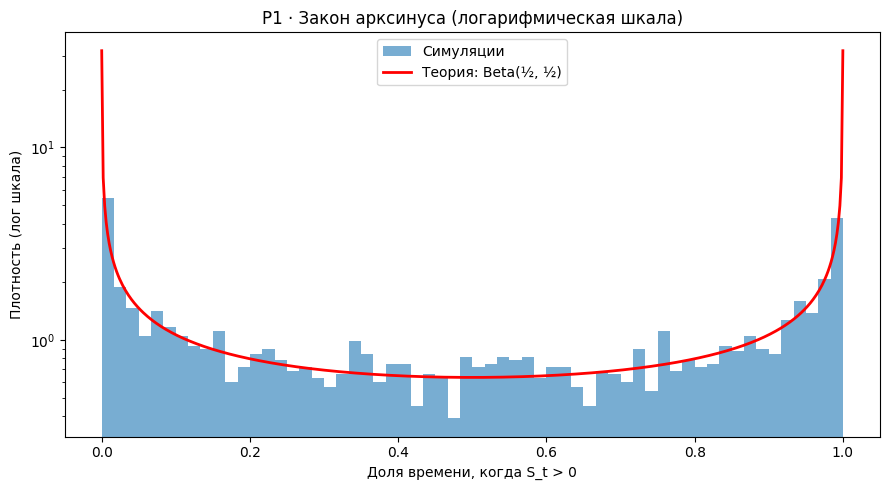

In [20]:
# ==========================
# P1 · ДЗ: Закон арксинуса
# ==========================


# TODO
def simulate_random_walks(T=2000, M=2000):
    """По сути, вам нужно случайно выбирать из {-1, 1} каждый шаг,
    после чего посчитать кумулятивную
    и потом усреднить значения, что больше нуля"""
    steps: np.ndarray = np.random.choice([-1, 1], size=(T, M))
    trajectories: np.ndarray = np.cumsum(steps, axis=0)
    fractions_above_zero: np.ndarray = np.mean(trajectories > 0, axis=0)
    return fractions_above_zero

    
# !!!ЗДЕСЬ НЕ НУЖНО МЕНЯТЬ, ЭТО ВЫВОД КАРТИНОК/СЛУЖЕБНОЕ!!!
def probability_P1_logy(T=2000, M=2000, bins=60):
    frac = simulate_random_walks(T, M)
    plt.figure(figsize=(9, 5))
    plt.hist(frac, bins=bins, density=True, alpha=0.6,
    label="Симуляции", color="C0")
    # Теоретическая плотность Beta(1/2,1/2)
    x = np.linspace(1e-4, 1-1e-4, 500)
    pdf = 1 / (np.pi * np.sqrt(x * (1 - x)))
    plt.plot(x, pdf, "r-", lw=2, label="Теория: Beta(½, ½)")
    plt.yscale("log")
    plt.xlabel("Доля времени, когда S_t > 0")
    plt.ylabel("Плотность (лог шкала)")
    plt.title("P1 · Закон арксинуса (логарифмическая шкала)")
    plt.legend()
    plt.tight_layout()
    plt.show()
    
probability_P1_logy()

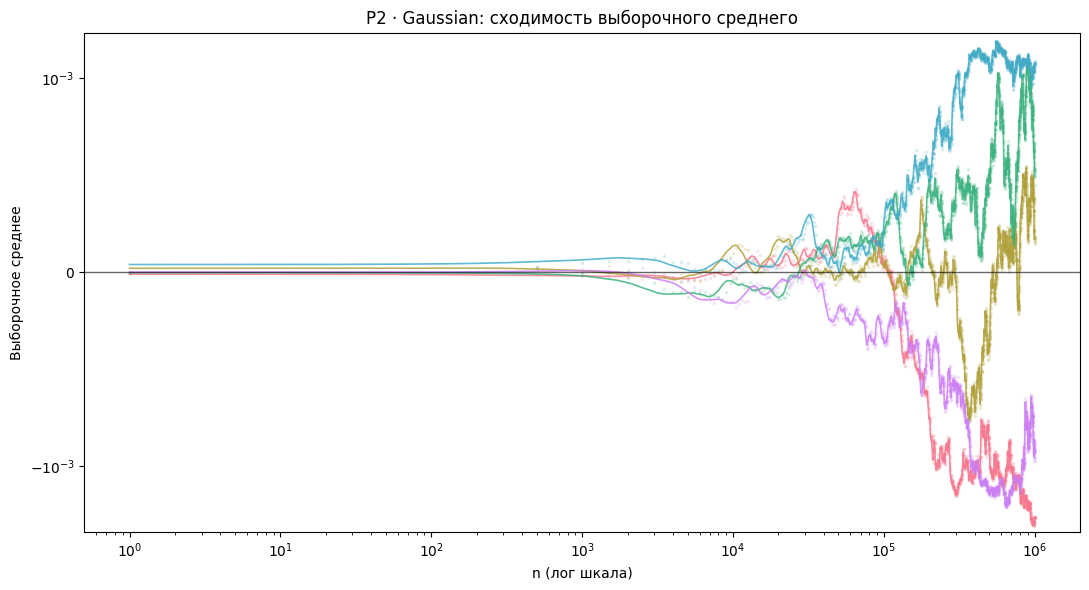

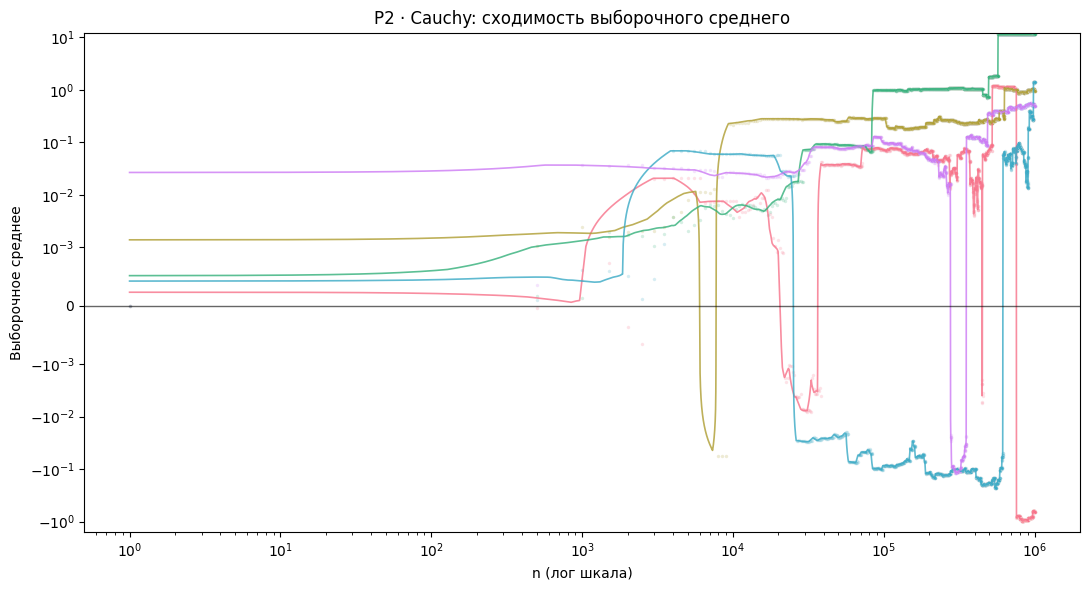

In [7]:
# ==========================
# P2 · ДЗ: Закон больших чисел vs распределение Коши
# ==========================


# TODO
def sample_means(dist="gaussian", Nmax=1_000_000_000):
    """Используйте базовую randn для гауссового, а для распределения
    Коши можно взять tan от этого, после чего посчитать
    в итоге просто кумулятивную сумму (т.к. это распределения), и
    нормировать его на размер выборки"""
    arr: np.ndarray = np.random.randn(Nmax)
    if dist == "cauchy": arr = np.tan(arr)
    normalized: np.ndarray = np.cumsum(arr) / Nmax
    return normalized


# !!!ЗДЕСЬ НЕ НУЖНО МЕНЯТЬ, ЭТО ВЫВОД КАРТИНОК/СЛУЖЕБНОЕ!!!
def plot_scatter_trajectories(dist="gaussian", Nmax=1_000_000_000,
    traj=5, alpha=0.2, subsample=2000):
    
    plt.figure(figsize=(11, 6))
    palette = sns.color_palette("husl", traj)
    
    for i in range(traj):
        m = sample_means(dist, Nmax)
        n = np.arange(1, Nmax + 1)
        idx = np.linspace(0, Nmax - 1, subsample, dtype=int)
        sns.scatterplot(x=n[idx], y=m[idx], s=6, alpha=alpha, color=palette[i])
        window = max(50, Nmax // 500)
        smooth = np.convolve(m, np.ones(window) / window, mode='valid')
        plt.plot(n[:len(smooth)], smooth, color=palette[i], lw=1.2, alpha=0.8)

    plt.xscale("log")
    plt.yscale("symlog", linthresh=1e-3)
    plt.xlabel("n (лог шкала)")
    plt.ylabel("Выборочное среднее")
    plt.title(f"P2 · {dist.capitalize()}: сходимость выборочного среднего")
    plt.axhline(0, color="black", lw=1, alpha=0.6)
    plt.tight_layout()
    plt.show()


plot_scatter_trajectories("gaussian", Nmax=1_000_000)
plot_scatter_trajectories("cauchy", Nmax=1_000_000)

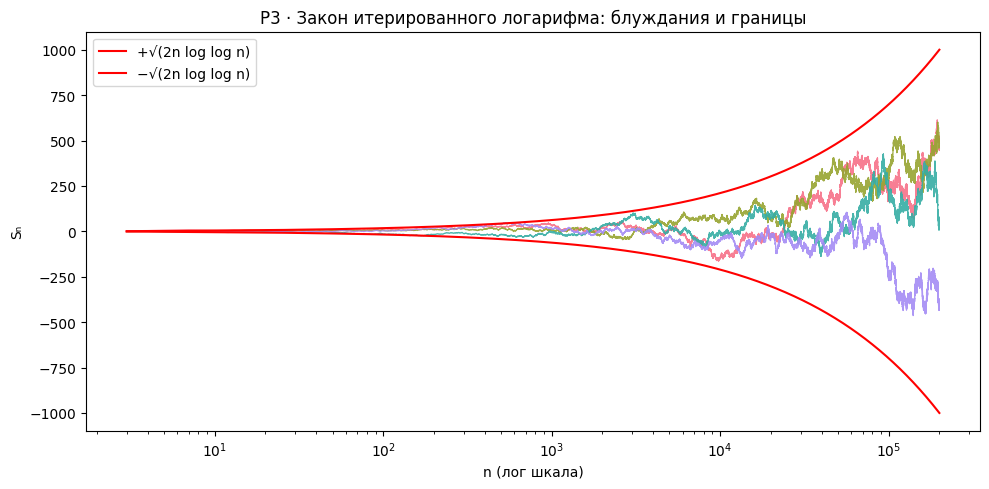

In [10]:
# ==========================
# P3 · ДЗ: Закон итерированного логарифма (LIL)
# ==========================
# TODO
def simulate_walk(T=2000, rng=None):
    """По сути, вам нужно случайно выбирать из {-1, 1} каждый шаг,
    после чего посчитать кумулятивную сумму и ее вернуть.
    Не как в предыдущем задании"""
    if rng is None:
        rng = np.random.default_rng()
    steps = rng.choice([-1, 1], size=T)
    cumulative_sum = np.cumsum(steps)
    return cumulative_sum


# !!!ЗДЕСЬ НЕ НУЖНО МЕНЯТЬ, ЭТО ВЫВОД КАРТИНОК/СЛУЖЕБНОЕ!!!
def probability_P3_LIL_one(T=200_000, traj=4, seed=7):
    rng = np.random.default_rng(seed)
    n = np.arange(3, T + 1)
    a = np.sqrt(2.0 * n * np.log(np.log(n))) # огибающая
    plt.figure(figsize=(10, 5))
    palette = sns.color_palette("husl", traj)
    
    for i in range(traj):
        S = simulate_walk(T, rng)[2:] # сдвиг, чтобы длины совпадали
        sns.lineplot(x=n, y=S, lw=0.9, alpha=0.9, color=palette[i], label=None)
        
    plt.plot(n, a, color="red", lw=1.5, label="+√(2n log log n)")
    plt.plot(n, -a, color="red", lw=1.5, label="−√(2n log log n)")
    plt.xscale("log")
    plt.xlabel("n (лог шкала)")
    plt.ylabel("Sₙ")
    plt.title("P3 · Закон итерированного логарифма: блуждания и границы")
    plt.legend()
    plt.tight_layout()
    plt.show()

              
# --- Пример ---
probability_P3_LIL_one()

# PI Calculating

In [30]:
# ==========================
# MC · ДЗ: Оценка числа π методами Монте-Карло
# ==========================
import pandas as pd
import math
import os
PI_TRUE = math.pi
OUT_DIR = "mc_pi_results"
os.makedirs(OUT_DIR, exist_ok=True)

#TODO
def generate_points(n, rng):
    """Генерируем n точек (x,y) в квадрате [0,1]×[0,1]
    и отмечаем, попали ли они в четверть круга x²+y² ≤ 1
    """
    randPoints: np.ndarray = rng.random((n, 2))
    radiuses: np.ndarray = np.sum(np.square(randPoints), axis=1)
    pointsMask: np.ndarray = np.astype(radiuses <= 1, "int")
    return randPoints.reshape(2, n), pointsMask


# TODO
def mc_plain_pi(n, rng):
    """Берём квадрат со стороной 1 и вписанную в него четверть круга
    радиуса 1
    Если случайно раскидать в квадрате точки, часть из них окажется
    внутри круга.
    Доля таких точек показывает отношение площадей, которое примерно
    равно пи разделить на четыре.
    Умножая эту долю на четыре, получаем приближение числа пи. Кода
    будет меньше, чем объяснения"""
    coordinates, pointsMask = generate_points(n, rng)
    pointsInside = int(np.sum(pointsMask))
    computedPI = float(pointsInside / n * 4)
    return computedPI, coordinates[0], coordinates[1], pointsMask

    
# !!!ЗДЕСЬ НЕ НУЖНО МЕНЯТЬ, ЭТО ВЫВОД КАРТИНОК/СЛУЖЕБНОЕ!!!
def monte_carlo_pi_experiment(n_list=(200, 1000, 5000), R=50, seed=42):
    
    base = np.random.default_rng(seed)
    rows = []
    stds, rmses = [], []
    all_points = []
    print(f"\n{'='*60}")
    print(f" Монте-Карло оценка числа π")
    print(f" Истинное значение π = {PI_TRUE:.10f}")
    print(f"{'='*60}\n")
    
    for n in n_list:
        print(f"Обработка n = {n:,} точек ...", end="")
        seeds = base.integers(1, 10**9, size=R)
        estimates = []
        
        for s in seeds:
            val, x, y, inside = mc_plain_pi(n, np.random.default_rng(s))
            estimates.append(val)
            
        estimates = np.array(estimates)
        std = estimates.std(ddof=1)
        rmse = np.sqrt(np.mean((estimates - PI_TRUE) ** 2))
        mean_est = estimates.mean()
        rows.append({"n": n, "mean": mean_est, "std": std, "rmse": rmse})
        stds.append(std)
        rmses.append(rmse)
        
    # Сохраняем точки из первой симуляции
    _, x, y, inside = mc_plain_pi(n, np.random.default_rng(seeds[0]))
    dfp = pd.DataFrame({"x": x, "y": y, "inside": inside})
    all_points.append(dfp)
    
    # Визуализация точек
    plt.figure(figsize=(5, 5))
    sns.scatterplot(
        data=dfp,
        x="x", y="y",
        hue="inside",
        palette={True: "C0", False: "lightgray"},
        alpha=0.6, s=20, edgecolor=None, legend=False
    )
    circle = np.linspace(0, np.pi / 2, 300)
    plt.plot(np.cos(circle), np.sin(circle), "r--", lw=1.2)
    plt.gca().set_aspect("equal")
    plt.title(f"Монте-Карло π — n={n}\nπ={mean_est:.6f}, Δ={abs(mean_est-PI_TRUE):.6f}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.tight_layout()
    fname = os.path.join(OUT_DIR, f"mc_pi_points_n{n}.png")
    plt.savefig(fname, dpi=130)
    plt.close()
    print(f" сохранено: {fname}")
    
    # --- График дисперсии ---
    plt.figure(figsize=(8, 5))
    sns.lineplot(x=n_list, y=stds, marker="o", linewidth=2)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("n (число точек)")
    plt.ylabel("std(оценки π)")
    plt.title("MC π — дисперсия оценок")
    plt.tight_layout()
    fname_std = os.path.join(OUT_DIR, "std_vs_n.png")
    plt.savefig(fname_std, dpi=130)
    plt.close()
    # --- График RMSE ---
    plt.figure(figsize=(8, 5))
    sns.lineplot(x=n_list, y=rmses, marker="o", linewidth=2)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("n (число точек)")
    plt.ylabel("RMSE(π vs π)")
    plt.title("MC π — среднеквадратичная ошибка")
    plt.tight_layout()

    fname_rmse = os.path.join(OUT_DIR, "rmse_vs_n.png")
    plt.savefig(fname_rmse, dpi=130)
    plt.close()
    # --- Таблица результатов ---
    df = pd.DataFrame(rows).round(6)
    print("\nИтоговые результаты:")
    print(df.to_string(index=False))
    print(f"\nГрафики сохранены в папку: {OUT_DIR}\n")
    return df


df_res = monte_carlo_pi_experiment()


 Монте-Карло оценка числа π
 Истинное значение π = 3.1415926536

Обработка n = 200 точек ...Обработка n = 1,000 точек ...Обработка n = 5,000 точек ...

/tmp/ipykernel_23742/1663103213.py:87: UserWarning: Glyph 145 (\x91) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_23742/1663103213.py:89: UserWarning: Glyph 145 (\x91) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=130)


 сохранено: mc_pi_results/mc_pi_points_n5000.png


/tmp/ipykernel_23742/1663103213.py:113: UserWarning: Glyph 145 (\x91) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_23742/1663103213.py:116: UserWarning: Glyph 145 (\x91) missing from font(s) DejaVu Sans.
  plt.savefig(fname_rmse, dpi=130)



Итоговые результаты:
   n     mean      std     rmse
 200 3.135600 0.115160 0.114160
1000 3.140160 0.043051 0.042642
5000 3.144448 0.023326 0.023267

Графики сохранены в папку: mc_pi_results

